In [1]:
# We are going to predict data for next 20 days

In [79]:
import numpy as np #we can implement multi dimensional data easily
import pandas as pd #maniplulation tool mainly for tabular columns
#visualization libraries
import matplotlib.pyplot as plt

#Machine learning Library
import sklearn
from sklearn.linear_model import LinearRegression

#preprocessing methods importing from sk learn

from sklearn.model_selection import train_test_split 



In [93]:
confirmed_cases = pd.read_csv("time_series_covid19_confirmed_global.csv") #DATASET EXTRACTED FROM'johns hopkins university

In [94]:
#reading the confirmed corona cases across the world till dec 27th 2021 from jan 1st 2020
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,157787,157797,157816,157841,157878,157887,157895,157951,157967,157998
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,205777,205897,206273,206616,206935,207221,207542,207709,207709,208352
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,214592,214835,215145,215430,215723,216098,216376,216637,216930,217265
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,20549,21062,21062,21372,21571,21730,21730,21730,22332,22540
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,65938,66086,66566,67199,68362,70221,71142,71752,71752,76787


In [95]:
#reading coronavirus death reports across the world
deaths_reported = pd.read_csv("time_series_covid19_deaths_global.csv")

In [96]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7335,7335,7335,7341,7346,7348,7349,7354,7354,7355
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3166,3172,3178,3180,3181,3187,3189,3194,3194,3207
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6184,6190,6198,6205,6213,6222,6229,6238,6246,6254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,134,137,137,138,139,139,139,139,139,140
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1738,1738,1738,1741,1743,1746,1746,1749,1749,1756


In [97]:
#reading coronavirus recovered across the world
recovered_cases =pd.read_csv("time_series_covid19_recovered_global.csv")

In [98]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
cols = confirmed_cases.keys()
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/19/21', '12/20/21', '12/21/21', '12/22/21', '12/23/21', '12/24/21',
       '12/25/21', '12/26/21', '12/27/21', '12/28/21'],
      dtype='object', length=711)


In [131]:
confirmed = confirmed_cases.loc[: , cols[4]:cols[-150]]

In [132]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21
0,0,0,0,0,0,0,0,0,0,0,...,143439,143666,143871,144285,145008,145552,145996,146523,147154,147501
1,0,0,0,0,0,0,0,0,0,0,...,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121
2,0,0,0,0,0,0,0,0,0,0,...,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564
3,0,0,0,0,0,0,0,0,0,0,...,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678
4,0,0,0,0,0,0,0,0,0,0,...,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,2,2,2,2,2,2,2,2,2,...,86957,94913,101173,106347,117121,123640,133405,141122,150060,157507
276,0,0,0,0,0,0,0,0,0,0,...,315968,315968,316088,316088,316189,316328,316487,316603,316738,316861
277,0,0,0,0,0,0,0,0,0,0,...,7003,7008,7012,7012,7022,7027,7042,7058,7061,7070
278,0,0,0,0,0,0,0,0,0,0,...,190615,191527,192071,192316,192956,193432,194140,195096,195816,196293


In [133]:
recovered = recovered_cases.loc[: , cols[4]:cols[-150]]

In [134]:
recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21
0,0,0,0,0,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,0,0,0,0,0,0,0,0,0,0,...,130118,130125,130139,130152,130166,130174,130187,130205,130222,130243
2,0,0,0,0,0,0,0,0,0,0,...,109349,109951,110577,111322,112050,112900,113707,114531,115276,116009
3,0,0,0,0,0,0,0,0,0,0,...,13988,13988,13988,14077,14113,14113,14180,14210,14210,14210
4,0,0,0,0,0,0,0,0,0,0,...,35284,35423,35474,35686,35742,35964,36025,36708,37255,37397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0,0,0,0,0,0,0,0,0,0,...,15536,17583,19342,21344,22946,27457,31780,35484,38734,43157
261,0,0,0,0,0,0,0,0,0,0,...,311380,311380,311526,311526,311560,311622,311714,311772,311832,311918
262,0,0,0,0,0,0,0,0,0,0,...,4163,4166,4166,4166,4168,4168,4171,4171,4185,4200
263,0,0,0,0,0,0,0,0,0,0,...,179171,180535,181638,182665,183534,183957,185210,186211,187236,188106


In [135]:
deaths = deaths_reported.loc[ : , cols[4] : cols[-150]]

In [136]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21
0,0,0,0,0,0,0,0,0,0,0,...,6357,6393,6425,6477,6515,6577,6615,6677,6708,6737
1,0,0,0,0,0,0,0,0,0,0,...,2456,2456,2456,2456,2456,2457,2457,2457,2457,2457
2,0,0,0,0,0,0,0,0,0,0,...,4026,4042,4063,4087,4112,4161,4189,4219,4254,4291
3,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,128,128,128
4,0,0,0,0,0,0,0,0,0,0,...,981,982,984,991,994,1000,1003,1008,1011,1016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,0,0,0,0,0,0,0,0,0,...,370,370,370,524,524,630,1022,1161,1306,1306
276,0,0,0,0,0,0,0,0,0,0,...,3596,3596,3599,3599,3600,3601,3601,3601,3603,3604
277,0,0,0,0,0,0,0,0,0,0,...,1372,1373,1373,1373,1374,1374,1374,1375,1375,1377
278,0,0,0,0,0,0,0,0,0,0,...,3221,3250,3272,3295,3316,3338,3355,3376,3389,3406


In [137]:
dates = confirmed.keys()

In [138]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/23/21', '7/24/21', '7/25/21', '7/26/21', '7/27/21', '7/28/21',
       '7/29/21', '7/30/21', '7/31/21', '8/1/21'],
      dtype='object', length=558)

In [146]:
#sum of all the cases on the particular date for every country
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []
india_cases = []


for i in dates:
  confirmed_sum = confirmed[i].sum()
  #print(confirmed[i])
  #print(confirmed_sum)
  death_sum=deaths[i].sum()
  recovered_sum=recovered[i].sum()
  world_cases.append(confirmed_sum)
  total_deaths.append(death_sum)
  mortality_rate.append(death_sum/confirmed_sum)
  total_recovered.append(recovered_sum)
  #india_cases.append(confirmed_cases[confirmed_cases["country/Region"]=="India"][i].sum())
  


In [140]:
print(confirmed_sum) #in the world confirmed cases

198835032


In [141]:
print(death_sum)
print(recovered_sum)

4228037
129994389


In [147]:
print(world_cases)

[557, 655, 941, 1434, 2118, 2927, 5578, 6167, 8235, 9927, 12038, 16787, 19887, 23898, 27643, 30805, 34399, 37130, 40161, 42769, 44811, 45229, 60381, 66909, 69052, 71235, 73270, 75152, 75652, 76212, 76841, 78602, 78982, 79550, 80404, 81381, 82740, 84128, 86022, 88400, 90379, 92980, 95282, 98100, 102016, 106113, 110051, 114232, 119055, 126714, 132513, 146864, 157962, 169241, 184034, 200039, 219586, 246684, 277565, 309680, 344821, 387488, 428574, 479663, 542525, 607435, 677100, 734000, 799279, 876098, 959012, 1041923, 1126238, 1185171, 1256277, 1330151, 1399552, 1482877, 1570233, 1655623, 1730100, 1849635, 1920621, 2004469, 2082629, 2178015, 2266210, 2343459, 2420285, 2495724, 2571680, 2653519, 2737032, 2820960, 2903927, 2975368, 3045572, 3121378, 3198365, 3281736, 3370333, 3449993, 3524895, 3602083, 3682186, 3772588, 3861478, 3952059, 4036214, 4111910, 4188263, 4272702, 4357656, 4453534, 4549685, 4643963, 4722390, 4811104, 4907901, 5013067, 5119375, 5226717, 5331655, 5425132, 5512840, 56

In [148]:
#changing dates into days
v = 1
day_date = []
for i in range(len(dates)):
  v = i*1
  day_date.append(v)
print(day_date)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

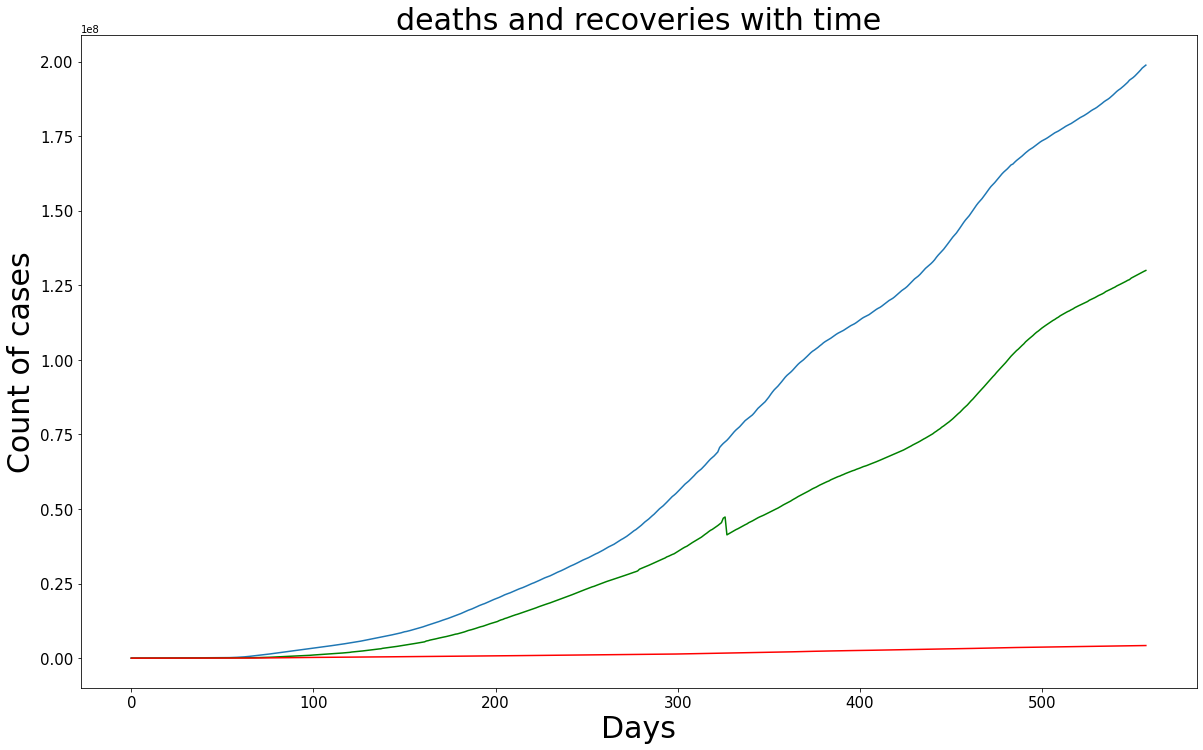

In [149]:
#plotting the cases (confirmed , recover and deaths) with time
plt.figure(figsize=(20,12))
plt.plot(day_date,world_cases)

plt.plot(day_date,total_recovered,color='green')

plt.plot(day_date,total_deaths,color='r')

plt.title("deaths and recoveries with time", size=30)

plt.xlabel("Days",size=30)

plt.ylabel("Count of cases",size=30)

plt.xticks(size=15)

plt.yticks(size=15)

plt.show()




In [150]:
#check each day cases in world

def eachday_increase(records):
  d=[]
  for i in range(len(records)):
    if i ==0:
      d.append(records[0])
    else:
      d.append(records[i]-records[i-1])
  return d

In [152]:
world_daily_increase = eachday_increase(world_cases) 
print(world_daily_increase)

[557, 98, 286, 493, 684, 809, 2651, 589, 2068, 1692, 2111, 4749, 3100, 4011, 3745, 3162, 3594, 2731, 3031, 2608, 2042, 418, 15152, 6528, 2143, 2183, 2035, 1882, 500, 560, 629, 1761, 380, 568, 854, 977, 1359, 1388, 1894, 2378, 1979, 2601, 2302, 2818, 3916, 4097, 3938, 4181, 4823, 7659, 5799, 14351, 11098, 11279, 14793, 16005, 19547, 27098, 30881, 32115, 35141, 42667, 41086, 51089, 62862, 64910, 69665, 56900, 65279, 76819, 82914, 82911, 84315, 58933, 71106, 73874, 69401, 83325, 87356, 85390, 74477, 119535, 70986, 83848, 78160, 95386, 88195, 77249, 76826, 75439, 75956, 81839, 83513, 83928, 82967, 71441, 70204, 75806, 76987, 83371, 88597, 79660, 74902, 77188, 80103, 90402, 88890, 90581, 84155, 75696, 76353, 84439, 84954, 95878, 96151, 94278, 78427, 88714, 96797, 105166, 106308, 107342, 104938, 93477, 87708, 92810, 103136, 120437, 121077, 135908, 103545, 99256, 124449, 111635, 131871, 132341, 130603, 111882, 102906, 124159, 136197, 135566, 127514, 134534, 132420, 122318, 143710, 143494, 143

In [153]:
print(type(world_cases))

<class 'list'>


In [154]:
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)
print(world_cases.shape)

(558, 1)


In [155]:
print(type(day_date))

<class 'list'>


In [156]:
days = np.array(day_date).reshape(-1,1)

In [157]:
print(days.shape)

(558, 1)


In [158]:
days_in_future = 20

future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forcast[ : -20]


In [159]:
#future_forcast
#adjusted_dates

In [162]:
x_train_confirmed , x_test_confirmed , y_train_confirmed , y_test_confirmed = train_test_split(days,world_cases,test_size=0.25,shuffle=False)

In [164]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
poly_x_train_confirmed = poly.fit_transform(x_train_confirmed)
poly_x_test_confirmed = poly.fit_transform(x_test_confirmed)
poly_future_forcast=poly.fit_transform(future_forcast)

In [165]:
model = LinearRegression()
model.fit(poly_x_train_confirmed , y_train_confirmed)

LinearRegression()

In [166]:
test_pred = model.predict(poly_x_test_confirmed) 

In [167]:
predictions = model.predict(poly_future_forcast)

In [168]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [169]:
mean_squared_error(test_pred,y_test_confirmed)

951461620613645.2

In [170]:
mean_absolute_error(test_pred,y_test_confirmed)

26713195.43430137

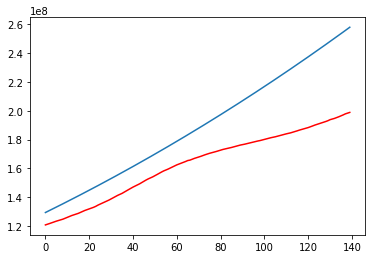

In [171]:
plt.plot(y_test_confirmed,color = "red")
plt.plot(test_pred)